### 1. Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder ### Convert categorical value to numerical value
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/classification.csv')

In [ ]:
df

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


### 2. Data Preprocessing

In [ ]:
df['success'] = df['success'].replace({0.0: 'fail', 1.0: 'pass'}) ### I change 0.0 to fail because i want to show how to convert categorical value to numerical value

In [ ]:
df

,age,interest,success
0,23.657801,18.859917,fail
1,22.573729,17.969223,fail
2,32.553424,29.463651,fail
3,6.718035,25.704665,pass
4,14.401919,16.770856,fail
...,...,...,...
292,27.697220,18.799309,fail
293,15.150959,72.000352,pass
294,22.264378,68.453459,pass
295,25.677420,90.118212,pass


We can see that "Age" data is not reasonable. Age data should be discrete data. In order to fix that i use numpy library.

In [ ]:
df['age'] = np.around(df['age'])

In [ ]:
df

,age,interest,success
0,24.0,18.859917,fail
1,23.0,17.969223,fail
2,33.0,29.463651,fail
3,7.0,25.704665,pass
4,14.0,16.770856,fail
...,...,...,...
292,28.0,18.799309,fail
293,15.0,72.000352,pass
294,22.0,68.453459,pass
295,26.0,90.118212,pass


In [ ]:
df.to_csv('/content/classification_exam.csv') ### Save the new csv file

In [ ]:
df = pd.read_csv('/content/classification_exam.csv')

In [ ]:
df

,Unnamed: 0,age,interest,success
0,0,24.0,18.859917,fail
1,1,23.0,17.969223,fail
2,2,33.0,29.463651,fail
3,3,7.0,25.704665,pass
4,4,14.0,16.770856,fail
...,...,...,...,...
292,292,28.0,18.799309,fail
293,293,15.0,72.000352,pass
294,294,22.0,68.453459,pass
295,295,26.0,90.118212,pass


In [ ]:
df = df.drop(columns=['Unnamed: 0']) ### I dropped the column becuase i dont want to know the unnmaed: 0

In [ ]:
df

,age,interest,success
0,24.0,18.859917,fail
1,23.0,17.969223,fail
2,33.0,29.463651,fail
3,7.0,25.704665,pass
4,14.0,16.770856,fail
...,...,...,...
292,28.0,18.799309,fail
293,15.0,72.000352,pass
294,22.0,68.453459,pass
295,26.0,90.118212,pass


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.1+ KB


In [ ]:
df['age'] = df['age'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   interest  297 non-null    float64
 2   success   297 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
df

,age,interest,success
0,24,18.859917,fail
1,23,17.969223,fail
2,33,29.463651,fail
3,7,25.704665,pass
4,14,16.770856,fail
...,...,...,...
292,28,18.799309,fail
293,15,72.000352,pass
294,22,68.453459,pass
295,26,90.118212,pass


In [ ]:
df.describe()

,age,interest
count,297.000000,297.000000
mean,23.703704,46.986527
std,8.851234,21.956447
min,2.000000,-0.852800
25%,17.000000,28.689067
50%,23.000000,45.695926
75%,31.000000,65.171876
max,46.000000,97.175508


### 3. EDA

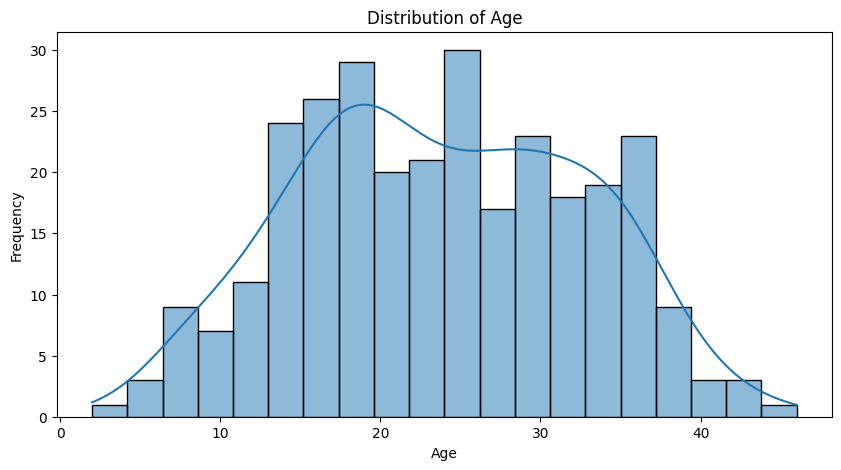

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

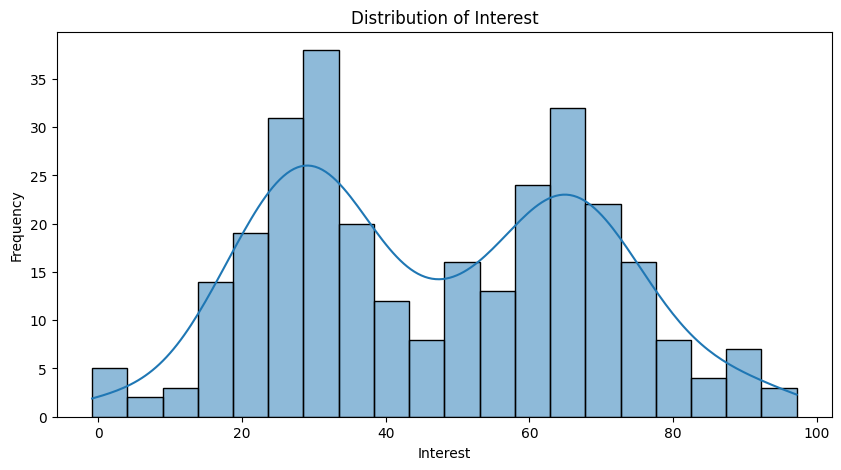

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['interest'], bins=20, kde=True)
plt.title('Distribution of Interest')
plt.xlabel('Interest')
plt.ylabel('Frequency')
plt.show()

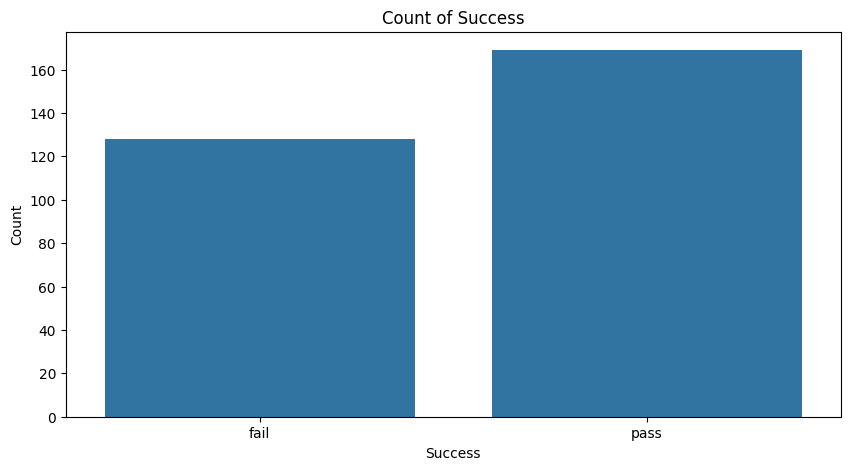

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='success', data=df)
plt.title('Count of Success')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

We can see that "pass" data is more than "fail" data. We can make decisions like, "What could we do in order to lessen the "fail" data than before".

### 4. Data Modelling

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded_success = encoder.fit_transform(df[['success']])
encoded_df = pd.DataFrame(encoded_success, columns=encoder.get_feature_names_out(['success'])) ### Create a DataFrame with Encoded Columns
df_encoded = pd.concat([df.drop('success', axis=1), encoded_df], axis=1)
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,age,interest,success_fail,success_pass
0,24,18.859917,1.0,0.0
1,23,17.969223,1.0,0.0
2,33,29.463651,1.0,0.0
3,7,25.704665,0.0,1.0
4,14,16.770856,1.0,0.0
...,...,...,...,...
292,28,18.799309,1.0,0.0
293,15,72.000352,0.0,1.0
294,22,68.453459,0.0,1.0
295,26,90.118212,0.0,1.0


In [ ]:
x = df[['age','interest']]
y = df[['success']]

In [ ]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
model = DecisionTreeClassifier().fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

### 5. Evaluation

In [ ]:
Accuracy_Score = accuracy_score(y_test,y_pred)
Precision_Score = precision_score(y_test,y_pred,average='macro')
Recall_Score = recall_score(y_test,y_pred,average='macro')
f1_score = f1_score(y_test,y_pred,average='macro')
print('Accuracy Score: ', Accuracy_Score)
print('Precision Score: ', Precision_Score)
print('Recall Score: ', Recall_Score)
print('F1 Score: ', f1_score)

Accuracy Score:  0.9
Precision Score:  0.9072398190045249
Recall Score:  0.9
F1 Score:  0.8995535714285714
